In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [ ]:

df = pd.read_csv("/content/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


<Axes: xlabel='emotion', ylabel='count'>

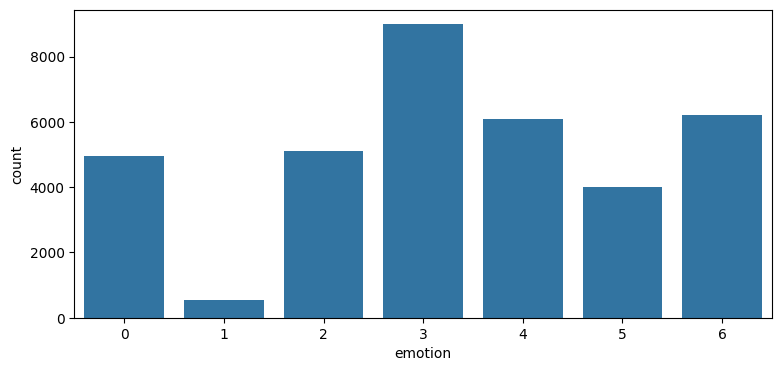

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [ ]:
df['emotion'].value_counts()


,count
emotion,
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


<Axes: xlabel='Usage', ylabel='count'>

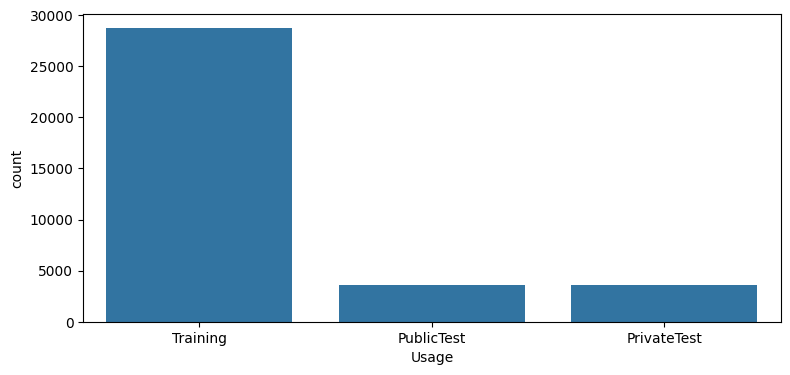

In [ ]:

plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [ ]:
df['Usage'].value_counts()


,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [ ]:
import cv2
image_size=(48,48)


In [ ]:
pixels = df['pixels'].tolist()  # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []
image_size = (48, 48)  # Assuming this is defined as the target size for resizing

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]  # Convert string to list of integers
    if len(face) != width * height:  # Validate the size of the sequence
        print(f"Skipping invalid pixel data with size {len(face)}. Expected size: {width * height}")
        continue
    face = np.asarray(face).reshape(width, height)  # Convert to numpy array and reshape
    face = cv2.resize(face.astype('uint8'), image_size)  # Resize the image
    faces.append(face.astype('float32'))  # Append the processed image

# Convert the list into a numpy array and expand dimensions
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)  # Add the color dimension (grayscale)

# Convert the 'emotion' column to one-hot encoded format
emotions = pd.get_dummies(df['emotion']).to_numpy()  # One-hot encode emotions


In [ ]:
print(faces[0]) #Pixels after preprocessing


[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [ ]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [ ]:
print(emotions[0]) #Emotion after preprocessing


[ True False False False False False False]


In [ ]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


In [ ]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0


In [ ]:
type(x)


numpy.ndarray

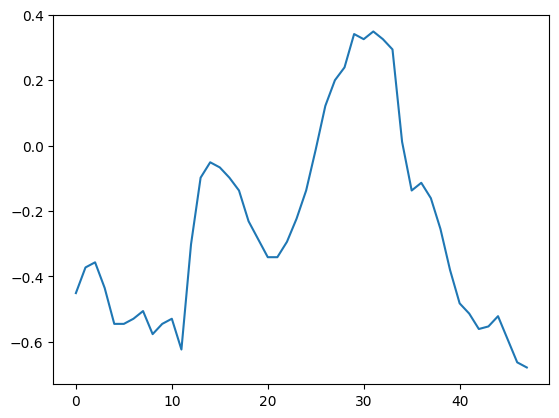

In [ ]:
plt.plot(x[0,0])
plt.show()

In [ ]:
print(x.min(),x.max()) # we can observe that pixels are scale


-1.0 1.0


In [ ]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [ ]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)


Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


In [ ]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2


In [ ]:
input_shape=(48, 48, 1)
num_classes = 7

In [ ]:
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_array (Conv2D)                 │ (None, 48, 48, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 48, 48, 16)          │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 24, 24, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 12, 12, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12, 12, 64)          │             2

 Total params: 642,935 (2.45 MB)

 Trainable params: 641,463 (2.45 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'


In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_array (Conv2D)                 │ (None, 48, 48, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 48, 48, 16)          │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 24, 24, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 12, 12, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12, 12, 64)          │             2

 Total params: 642,935 (2.45 MB)

 Trainable params: 641,463 (2.45 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.utils import to_categorical
from keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the FER2013 dataset
def load_fer2013_data(csv_path):
    # Load the CSV into a DataFrame
    df = pd.read_csv(csv_path)

    # Extract pixel data and emotion labels
    pixels = df['pixels'].tolist()
    emotions = df['emotion'].values

    # Preprocess the images
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]  # Convert string to list of integers
        face = np.asarray(face).reshape(48, 48)  # Reshape to 48x48
        face = cv2.resize(face.astype('uint8'), (48, 48))  # Resize to 48x48
        faces.append(face)

    # Convert faces list to numpy array
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)  # Add the channel dimension (grayscale)
    faces = faces.astype('float32') / 255.0  # Normalize the pixel values

    return faces, emotions

# Split the data into training and validation sets
def split_data(faces, emotions, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(faces, emotions, test_size=test_size, random_state=42)
    return (X_train, y_train), (X_val, y_val)

# Load and preprocess the dataset
dataset_path = '/content/fer2013.csv'
faces, emotions = load_fer2013_data(dataset_path)

# One-hot encode the labels
emotions = to_categorical(emotions, num_classes=7)

# Split the data into training and validation sets
(train_faces, train_emotions), (val_faces, val_emotions) = split_data(faces, emotions)

# Setup for model training
batch_size = 32
num_epochs = 30
patience = 10

# Define the data generator for augmentation
data_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20)

# Callbacks setup
log_file_path = dataset_path + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping(monitor='val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=int(patience / 4), verbose=1)

# Model checkpoint path
trained_models_path = '/content/simple_cnn'
model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.keras'
model_checkpoint = ModelCheckpoint(model_names, monitor='val_loss', verbose=1, save_best_only=True)

# Prepare the callbacks
my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

# Define your model once outside of the training loop
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # Output layer for 7 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now proceed with fitting the model
history = model.fit(data_generator.flow(train_faces, train_emotions, batch_size=batch_size),
                    epochs=num_epochs,
                    verbose=1,
                    callbacks=my_callbacks,
                    validation_data=(val_faces, val_emotions))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/898 ━━━━━━━━━━━━━━━━━━━━ 18:15 1s/step - accuracy: 0.2812 - loss: 1.9459

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2471 - loss: 1.8270
Epoch 1: val_loss improved from inf to 5.81933, saving model to /content/simple_cnn.01-5.82.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 72s 79ms/step - accuracy: 0.2471 - loss: 1.8270 - val_accuracy: 0.2459 - val_loss: 5.8193 - learning_rate: 0.0010
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2619 - loss: 1.7808
Epoch 2: val_loss did not improve from 5.81933
898/898 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.2619 - loss: 1.7808 - val_accuracy: 0.1106 - val_loss: 22.0026 - learning_rate: 0.0010
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3136 - loss: 1.7162
Epoch 3: val_loss did not improve from 5.81933

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.3136 - loss: 1.7162 - val_accuracy: 0.2459 - val_loss: 37.4796 - learning_rate: 0.0010
Epoch 4/30
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/s

In [ ]:
# Check the sizes again
print("val_x shape:", val_x.shape)
print("val_y shape:", val_y.shape)

# Adjust sizes if there's a mismatch
if val_x.shape[0] != val_y.shape[0]:
    print(f"Mismatch detected: val_x has {val_x.shape[0]} samples, val_y has {val_y.shape[0]} samples")

    # If val_y has an extra sample, remove it
    if val_y.shape[0] > val_x.shape[0]:
        val_y = val_y[:-1]  # Remove the last label
    # If val_x has an extra sample, remove it
    elif val_x.shape[0] > val_y.shape[0]:
        val_x = val_x[:-1]  # Remove the last image

# Recheck the sizes after adjustment
print("Adjusted val_x shape:", val_x.shape)
print("Adjusted val_y shape:", val_y.shape)

# Now you can safely evaluate the model
score = model.evaluate(val_x, val_y, verbose=1)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1] * 100)


val_x shape: (7178, 48, 48, 1)
val_y shape: (7178, 7)
Adjusted val_x shape: (7178, 48, 48, 1)
Adjusted val_y shape: (7178, 7)
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3243 - loss: 101.1631
Validation loss: 102.57698822021484
Validation accuracy: 32.320982217788696


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [ ]:
print(history_dict["accuracy"])


[0.24957330524921417, 0.27165696024894714, 0.3198300302028656, 0.3331707715988159, 0.33815181255340576, 0.33703717589378357, 0.33832594752311707, 0.33790796995162964, 0.3383956253528595, 0.33571353554725647, 0.3363405168056488]


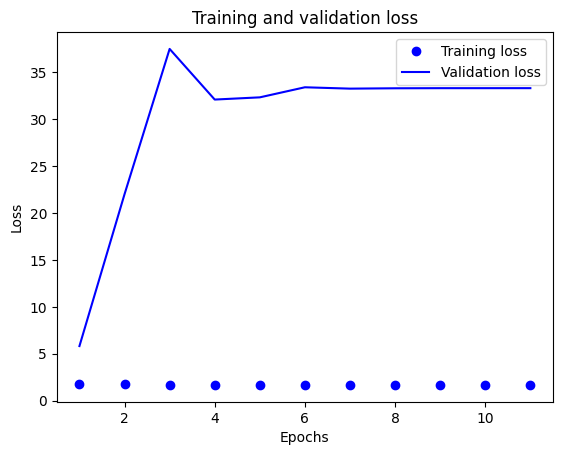

In [ ]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

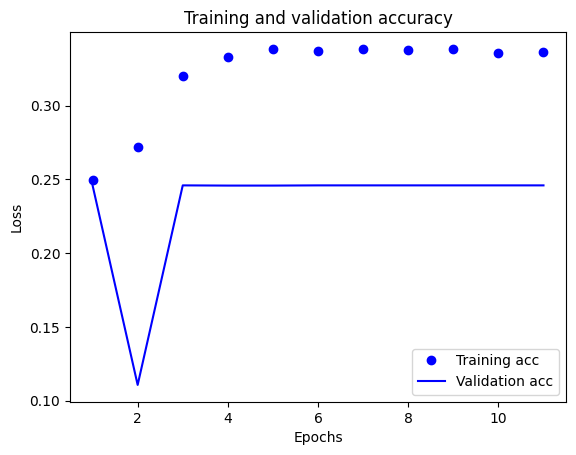

In [ ]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
emotion_dict = {0: "Neutral", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

In [ ]:
print(emojis.values(),sep=" ")


dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def _predict(path):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  imagePath = '/content/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                                              #if text is not apeared , change coordinates. it may work

  cv2_imshow(image)

In [ ]:
import os
print(os.path.exists('/content/me3.PNG'))


True


In [ ]:
def _predict(path):
    # Ensure the path is correct
    imagePath = '/content/' + path

    # Check if image exists
    if not os.path.exists(imagePath):
        print(f"Error: Image file '{path}' not found.")
        return

    # Read the image
    image = cv2.imread(imagePath)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Could not read the image.")
        return

    facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10)

    print("No of faces : ", len(faces))
    i = 1
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]  # Cropping
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)

        maxindex = int(np.argmax(prediction))
        print("Person", i, ":", emotion_dict[maxindex], "-->", emojis[maxindex])
        cv2.putText(image, emotion_dict[maxindex], (x + 10, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        i += 1

    cv2_imshow(image)


No of faces :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Person 1 : Happy --> 😊


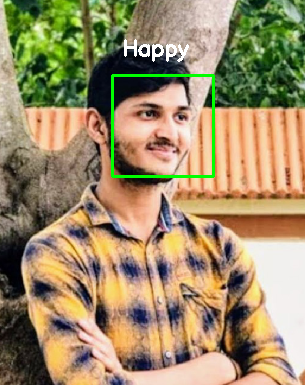

In [ ]:
_predict("me3.PNG")

No of faces :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Person 1 : Happy --> 😊


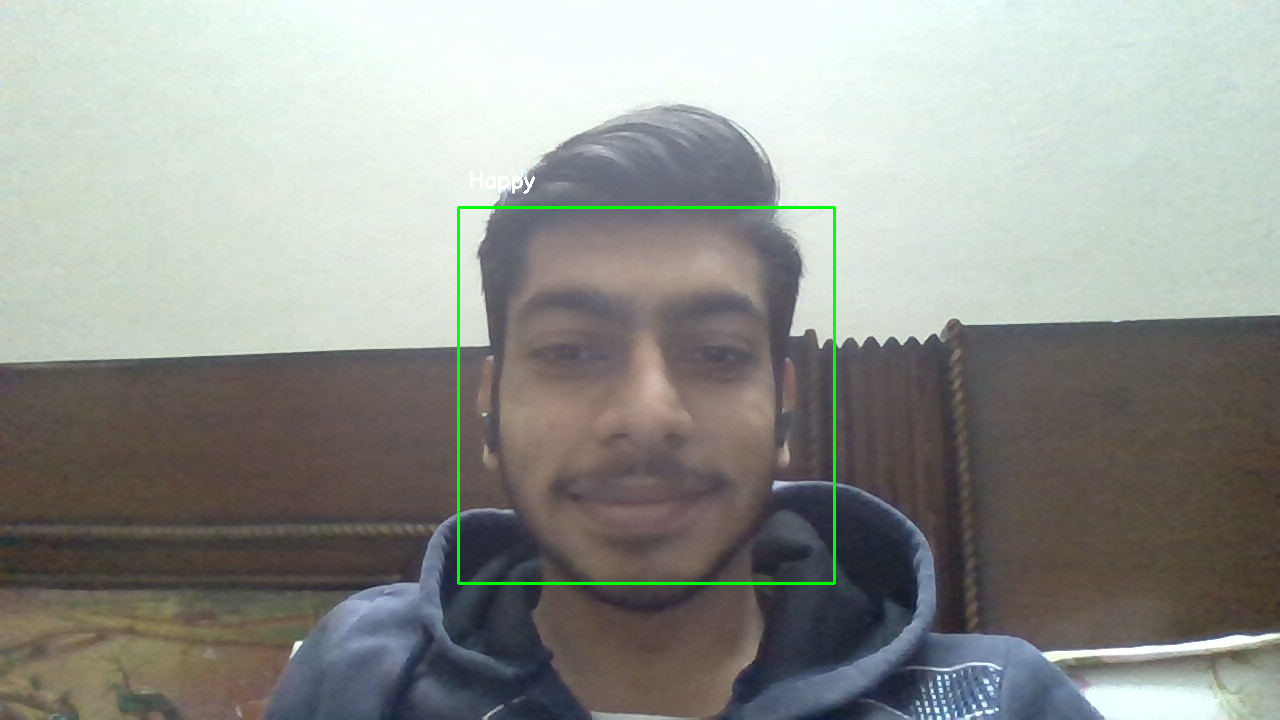

In [ ]:
_predict("WIN_20241230_16_38_35_Pro.jpg")